# Name: Gaurav Rajesh Makasare
# USCID: 7559721394
# email: makasare@usc.edu

# 1. Decision Trees as Interpretable Models

In [1]:
import pandas as pd
import csv
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as mplt
import seaborn as sns
import itertools
import math
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, scale
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as dtc # tree algorithm
from sklearn.metrics import accuracy_score # model precision
from sklearn.tree import plot_tree # tree diagram
from sklearn.multioutput import MultiOutputClassifier

In [2]:
with open ('../data/diagnosis.names') as f:
    text = f.read()
    print(text)
    a = []
    a = text.split('\n')
    print(a)
    attrlist = []
    print(len(attrlist))
#     for i in range(len(a)):
#         if('Attribute Information' in a[i]):
#             print(a[i])
#             attrlist.append(a[i])
#     print(len(attrlist))
            
#     columns = []
# #     for i in attrlist:
# #         final.append(i[12:])
#     for i in attrlist:
#         columns.append(i.split(' ')[1])
# print(columns)

Title: Acute Inflammations

Abstract: The data was created by a medical expert as a data set to test 
the expert system, which will perform the presumptive diagnosis of two 
diseases of the urinary system.
	
----------------------------------------------------------------------------

Data Set Characteristics:  Multivariate
Attribute Characteristics: Categorical, Integer
Associated Tasks: Classification
Number of Instances: 120
Number of Attributes: 6
Missing Values? No
Area: Life
Date Donated: 2009-02-11

----------------------------------------------------------------------------

Source:

Jacek Czerniak, Ph.D., Assistant Professor
Systems Research Institute
Polish Academy of Sciences
Laboratory of Intelligent Systems
ul. Newelska 6, Room 218
01-447 Warszawa, Poland
e-mail: jacek.czerniak 'at' ibspan.waw.pl or jczerniak 'at' ukw.edu.pl 

----------------------------------------------------------------------------


Data Set Information:

The main idea of this data set is to prepare t

In [3]:
with open('../data/diagnosis.data', encoding="utf8", errors='ignore') as f:
    print(f.read())


3 5 , 5 	 n o 	 y e s 	 n o 	 n o 	 n o 	 n o 	 n o 
 
 3 5 , 9 	 n o 	 n o 	 y e s 	 y e s 	 y e s 	 y e s 	 n o 
 
 3 5 , 9 	 n o 	 y e s 	 n o 	 n o 	 n o 	 n o 	 n o 
 
 3 6 , 0 	 n o 	 n o 	 y e s 	 y e s 	 y e s 	 y e s 	 n o 
 
 3 6 , 0 	 n o 	 y e s 	 n o 	 n o 	 n o 	 n o 	 n o 
 
 3 6 , 0 	 n o 	 y e s 	 n o 	 n o 	 n o 	 n o 	 n o 
 
 3 6 , 2 	 n o 	 n o 	 y e s 	 y e s 	 y e s 	 y e s 	 n o 
 
 3 6 , 2 	 n o 	 y e s 	 n o 	 n o 	 n o 	 n o 	 n o 
 
 3 6 , 3 	 n o 	 n o 	 y e s 	 y e s 	 y e s 	 y e s 	 n o 
 
 3 6 , 6 	 n o 	 n o 	 y e s 	 y e s 	 y e s 	 y e s 	 n o 
 
 3 6 , 6 	 n o 	 n o 	 y e s 	 y e s 	 y e s 	 y e s 	 n o 
 
 3 6 , 6 	 n o 	 y e s 	 n o 	 n o 	 n o 	 n o 	 n o 
 
 3 6 , 6 	 n o 	 y e s 	 n o 	 n o 	 n o 	 n o 	 n o 
 
 3 6 , 7 	 n o 	 n o 	 y e s 	 y e s 	 y e s 	 y e s 	 n o 
 
 3 6 , 7 	 n o 	 y e s 	 n o 	 n o 	 n o 	 n o 	 n o 
 
 3 6 , 7 	 n o 	 y e s 	 n o 	 n o 	 n o 	 n o 	 n o 
 
 3 6 , 8 	 n o 	 n o 	 y e s 	 y e s 	 y e s 	 y e s 	 n o 
 
 

In [4]:
df = pd.read_csv('../data/diagnosis.data', sep = '\t' ,encoding='utf-16')
df.columns
col = ['Temperature', 'Occurence of nausea', 'Lumber pain', 'Urine pushing', 'Micturition pain', 'Burninig of Urethra', 'd1', 'd2']
df = pd.read_csv('../data/diagnosis.data', sep = '\t' ,encoding='utf-16', names=col)

In [5]:
col = ['Temperature', 'Occurence of nausea', 'Lumber pain', 'Urine pushing', 'Micturition pain', 'Burninig of Urethra', 'd1', 'd2']

In [6]:
df = pd.read_csv('../data/diagnosis.data', sep = '\t' ,encoding='utf-16', names=col)

# (a) Download the Accute Inflamations data from https://archive.ics.uci.edu/ ml/datasets/Acute+Inflammations.

In [7]:
df

,Temperature,Occurence of nausea,Lumber pain,Urine pushing,Micturition pain,Burninig of Urethra,d1,d2
0,"35,5",no,yes,no,no,no,no,no
1,"35,9",no,no,yes,yes,yes,yes,no
2,"35,9",no,yes,no,no,no,no,no
3,"36,0",no,no,yes,yes,yes,yes,no
4,"36,0",no,yes,no,no,no,no,no
...,...,...,...,...,...,...,...,...
115,"41,4",no,yes,yes,no,yes,no,yes
116,"41,5",no,no,no,no,no,no,no
117,"41,5",yes,yes,no,yes,no,no,yes
118,"41,5",no,yes,yes,no,yes,no,yes


In [8]:
df2 = df.replace(regex=[','],value='.')

In [9]:
df2

,Temperature,Occurence of nausea,Lumber pain,Urine pushing,Micturition pain,Burninig of Urethra,d1,d2
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no
...,...,...,...,...,...,...,...,...
115,41.4,no,yes,yes,no,yes,no,yes
116,41.5,no,no,no,no,no,no,no
117,41.5,yes,yes,no,yes,no,no,yes
118,41.5,no,yes,yes,no,yes,no,yes


In [10]:
df3 = df2.replace(regex=['yes'], value='1')

In [11]:
df4 = df3.replace(regex = ['no'], value = '0')

In [12]:
df4

,Temperature,Occurence of nausea,Lumber pain,Urine pushing,Micturition pain,Burninig of Urethra,d1,d2
0,35.5,0,1,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0
2,35.9,0,1,0,0,0,0,0
3,36.0,0,0,1,1,1,1,0
4,36.0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
115,41.4,0,1,1,0,1,0,1
116,41.5,0,0,0,0,0,0,0
117,41.5,1,1,0,1,0,0,1
118,41.5,0,1,1,0,1,0,1


In [13]:
# from sklearn.datasets import make_multilabel_classification

# # this will generate a random multi-label dataset
# X, y = make_multilabel_classification(sparse = True, n_labels = 20,
# return_indicator = 'sparse', allow_unlabeled = False)

In [14]:
X_var = df4[['Temperature', 'Occurence of nausea', 'Lumber pain', 'Urine pushing', 'Micturition pain', 'Burninig of Urethra']].values
y_var1 = df4[['d1']].values

In [15]:
A_train, A_test, B_train1, B_test1 = train_test_split(X_var, y_var1, test_size = 0.2, random_state = 0)

In [16]:
model1 = dtc(criterion = 'entropy', max_depth = 4)
model1.fit(X_var, y_var1)

# pred_model = m.predict(X_test)

# print('Accuracy of the model is {:.0%}'.format(accuracy_score(y_test, pred_model)))

DecisionTreeClassifier(criterion='entropy', max_depth=4)

# (b) Build a decision tree on the whole data set and plot it


Decision tree 1 for label d1:



[Text(0.4, 0.875, 'Urine pushing <= 0.5\nentropy = 1.0\nsamples = 120\nvalue = [61, 59]\nclass = 0'),
 Text(0.2, 0.625, 'entropy = 0.0\nsamples = 40\nvalue = [40, 0]\nclass = 0'),
 Text(0.6, 0.625, 'Micturition pain <= 0.5\nentropy = 0.83\nsamples = 80\nvalue = [21, 59]\nclass = 1'),
 Text(0.4, 0.375, 'Temperature <= 37.95\nentropy = 0.907\nsamples = 31\nvalue = [21, 10]\nclass = 0'),
 Text(0.2, 0.125, 'entropy = 0.0\nsamples = 10\nvalue = [0, 10]\nclass = 1'),
 Text(0.6, 0.125, 'entropy = 0.0\nsamples = 21\nvalue = [21, 0]\nclass = 0'),
 Text(0.8, 0.375, 'entropy = 0.0\nsamples = 49\nvalue = [0, 49]\nclass = 1')]

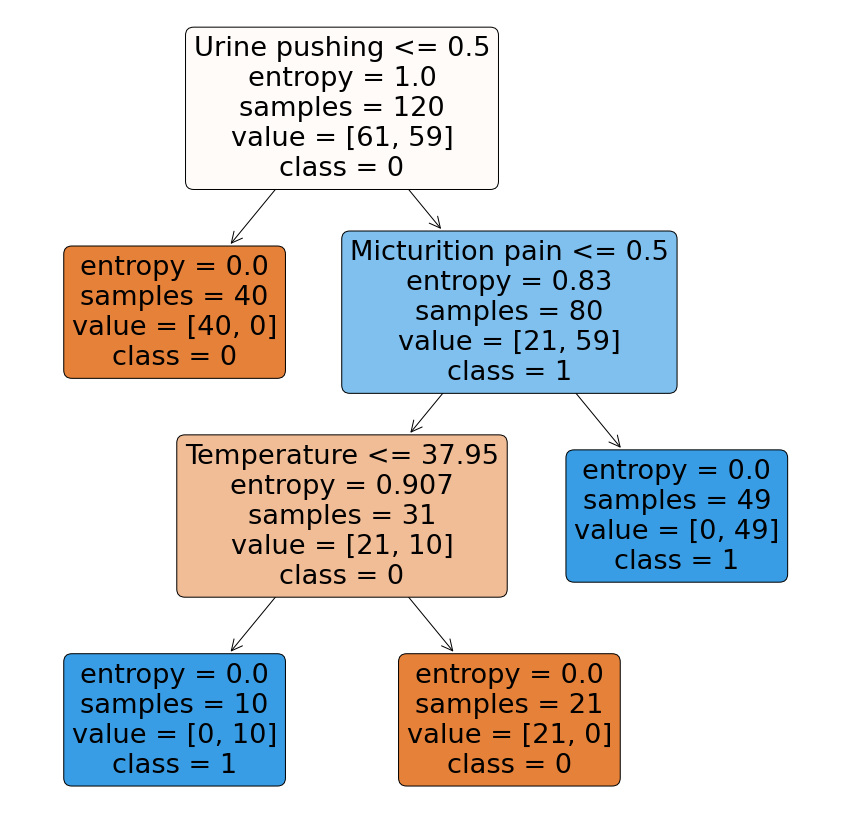

In [17]:
print("Decision tree 1 for label d1:")
print()
feature_names = df4.columns[:6]
target_names = df4['d1'].unique().tolist()
mplt.figure(figsize=(15, 15))
            
plot_tree(model1, 
          feature_names = feature_names, 
          class_names = target_names, 
          filled = True, 
          rounded = True)

In [18]:
X_var = df4[['Temperature', 'Occurence of nausea', 'Lumber pain', 'Urine pushing', 'Micturition pain', 'Burninig of Urethra']].values
y_var2 = df4[['d2']].values
A_train, A_test, B_train2, B_test2 = train_test_split(X_var, y_var2, test_size = 0.2, random_state = 0)

In [19]:
model2 = dtc(criterion = 'entropy', max_depth = 4)
model2.fit(X_var, y_var2)

pred_model = model2.predict(A_test)

# print('Accuracy of the model is {:.0%}'.format(accuracy_score(y_test, pred_model)))

Decision tree 2 for label d2:



[Text(0.4, 0.8333333333333334, 'Temperature <= 37.95\nentropy = 0.98\nsamples = 120\nvalue = [70, 50]\nclass = 0'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 60\nvalue = [60, 0]\nclass = 0'),
 Text(0.6, 0.5, 'Lumber pain <= 0.5\nentropy = 0.65\nsamples = 60\nvalue = [10, 50]\nclass = 1'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.0\nsamples = 10\nvalue = [10, 0]\nclass = 0'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.0\nsamples = 50\nvalue = [0, 50]\nclass = 1')]

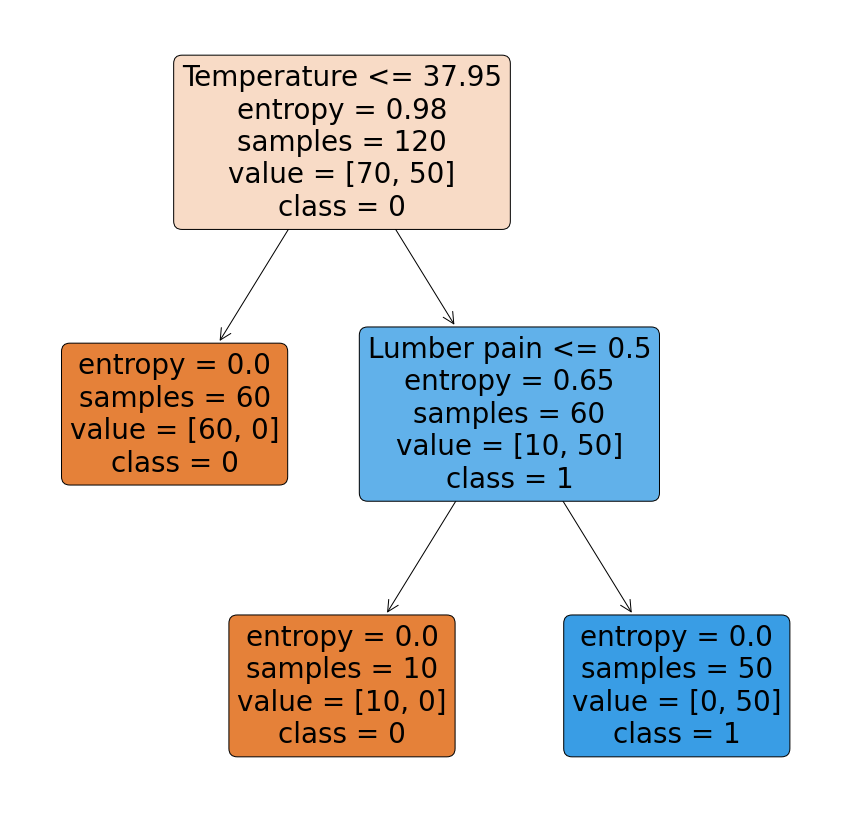

In [20]:
print("Decision tree 2 for label d2:")
print()
feature_names = df4.columns[:]
target_names = df4['d2'].unique().tolist()
mplt.figure(figsize=(15, 15))
            
plot_tree(model2, 
          feature_names = feature_names, 
          class_names = target_names, 
          filled = True, 
          rounded = True)

# (c) Convert the decision rules into a set of IF-THEN rules.2

In [21]:
def tree_to_pseudo(tree, feature_names):

    '''
    Outputs a decision tree model as if/then pseudocode

    Parameters:
    -----------
    tree: decision tree model
        The decision tree to represent as pseudocode
    feature_names: list
        The feature names of the dataset used for building the decision tree
    '''

    left = tree.tree_.children_left
    right = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features = [feature_names[i] for i in tree.tree_.feature]
    value = tree.tree_.value

    def recurse(left, right, threshold, features, node, depth=0):
        indent = "  " * depth
        if (threshold[node] != -2):
            print(indent,"if ( " + features[node] + " <= " + str(threshold[node]) + " ) {")
            if left[node] != -1:
                recurse(left, right, threshold, features, left[node], depth+1)
                print (indent,"} else {")
                if right[node] != -1:
                    recurse (left, right, threshold, features, right[node], depth+1)
                print(indent,"}")
        else:
            print(indent,"return " + str(value[node]))

    recurse(left, right, threshold, features, 0)

In [22]:
print("IF ELSE Rules for tree with label d1: ")
print()
print()
tree_to_pseudo(model1, ['Temperature', 'Occurence of nausea', 'Lumber pain', 'Urine pushing', 'Micturition pain', 'Burninig of Urethra'])


IF ELSE Rules for tree with label d1: 


 if ( Urine pushing <= 0.5 ) {
   return [[40.  0.]]
 } else {
   if ( Micturition pain <= 0.5 ) {
     if ( Temperature <= 37.95000076293945 ) {
       return [[ 0. 10.]]
     } else {
       return [[21.  0.]]
     }
   } else {
     return [[ 0. 49.]]
   }
 }


In [23]:
print("IF ELSE Rules for tree with label d2: ")
print()
print()
tree_to_pseudo(model2, ['Temperature', 'Occurence of nausea', 'Lumber pain', 'Urine pushing', 'Micturition pain', 'Burninig of Urethra'])


IF ELSE Rules for tree with label d2: 


 if ( Temperature <= 37.95000076293945 ) {
   return [[60.  0.]]
 } else {
   if ( Lumber pain <= 0.5 ) {
     return [[10.  0.]]
   } else {
     return [[ 0. 50.]]
   }
 }


# (d) Use cost-complexity pruning to find a minimal decision tree and a set of decision rules with high interpretability.

In [24]:
path = model1.cost_complexity_pruning_path(X_var, y_var1)
alphas = path['ccp_alphas']
alphas

array([0.        , 0.23435116, 0.31931253, 0.44613593])

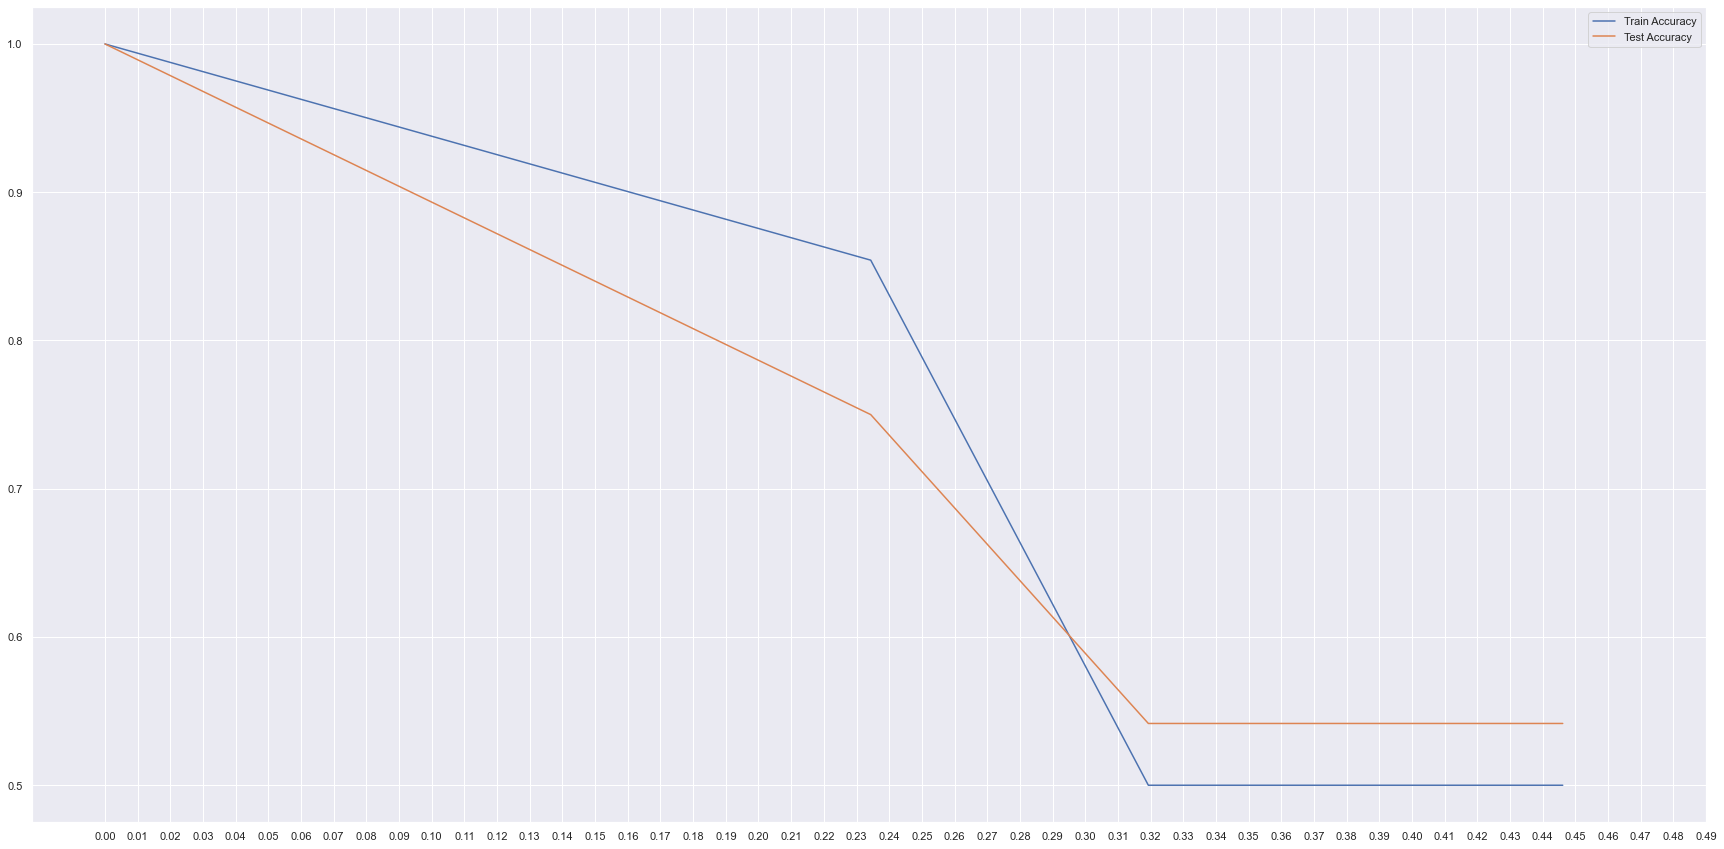

In [25]:
accuracy_train = []
accuracy_test = []
for i in alphas:
    tree = dtc(ccp_alpha = i)
    tree.fit(A_train, B_train1)
    y_train_pred = tree.predict(A_train)
    y_test_pred = tree.predict(A_test)
    
    accuracy_train.append(accuracy_score(B_train1, y_train_pred))
    accuracy_test.append(accuracy_score(B_test1, y_test_pred))
    
sns.set()
mplt.figure(figsize=(30,15))
sns.lineplot(y = accuracy_train, x = alphas, label = 'Train Accuracy')
sns.lineplot(y = accuracy_test, x=alphas, label = "Test Accuracy")
mplt.xticks(ticks = np.arange(0.00, 0.5, 0.01))
mplt.show()

In [26]:
path = model1.cost_complexity_pruning_path(X_var, y_var1)
alphas = path['ccp_alphas']
alphas
alphas = alphas[1:]

In [27]:
gs_cv = GridSearchCV(estimator=model1, param_grid={'ccp_alpha': alphas}, cv=10)
gs_cv.fit(X_var, y_var1)

best_alpha = gs_cv.best_params_
print('Best alpha: ', best_alpha['ccp_alpha'])

Best alpha:  0.23435115662304618


Decision tree 1 pruned: 



[Text(0.4, 0.8333333333333334, 'Urine pushing <= 0.5\nentropy = 1.0\nsamples = 120\nvalue = [61, 59]\nclass = 0'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 40\nvalue = [40, 0]\nclass = 0'),
 Text(0.6, 0.5, 'Micturition pain <= 0.5\nentropy = 0.83\nsamples = 80\nvalue = [21, 59]\nclass = 1'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.907\nsamples = 31\nvalue = [21, 10]\nclass = 0'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.0\nsamples = 49\nvalue = [0, 49]\nclass = 1')]

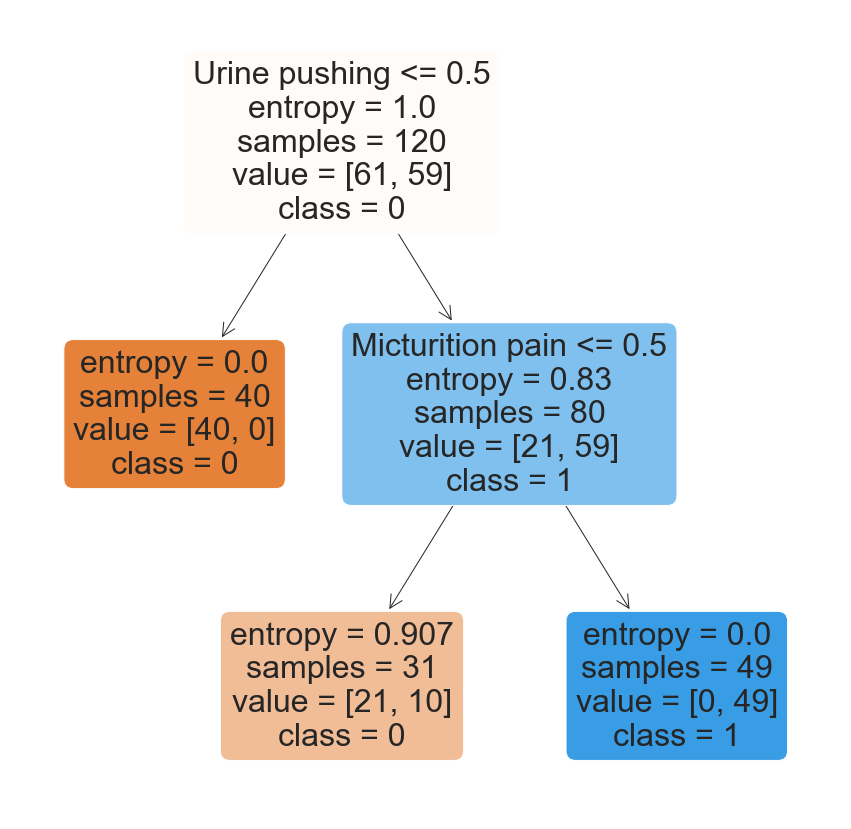

In [28]:
print('Decision tree 1 pruned: ')
print()
dt1 = dtc(criterion = 'entropy', ccp_alpha = best_alpha['ccp_alpha'])
dt1 = dt1.fit(X_var, y_var1)

mplt.figure(figsize = (15,15))
plot_tree(dt1, 
          feature_names = feature_names, 
          class_names = target_names, 
          filled = True, 
          rounded = True)

In [29]:
path = model2.cost_complexity_pruning_path(X_var, y_var2)
alphas = path['ccp_alphas']
alphas
alphas = alphas[1:]

In [30]:
gs_cv = GridSearchCV(estimator=model2, param_grid={'ccp_alpha': alphas}, cv=10)
gs_cv.fit(X_var, y_var1)

best_alpha = gs_cv.best_params_
print('Best alpha: ', best_alpha['ccp_alpha'])

Best alpha:  0.32501121082417705


Decision tree 2 pruned: 



[Text(0.4, 0.8333333333333334, 'Temperature <= 37.95\nentropy = 0.98\nsamples = 120\nvalue = [70, 50]\nclass = 0'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 60\nvalue = [60, 0]\nclass = 0'),
 Text(0.6, 0.5, 'Lumber pain <= 0.5\nentropy = 0.65\nsamples = 60\nvalue = [10, 50]\nclass = 1'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.0\nsamples = 10\nvalue = [10, 0]\nclass = 0'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.0\nsamples = 50\nvalue = [0, 50]\nclass = 1')]

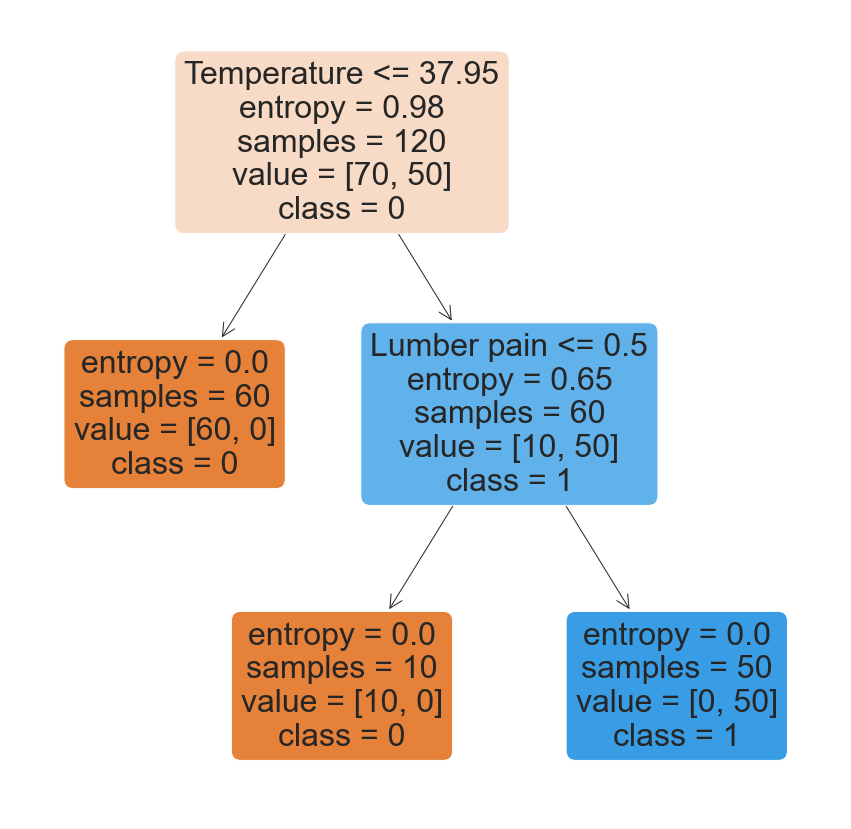

In [31]:
print('Decision tree 2 pruned: ')
print()
dt2 = dtc(criterion = 'entropy', ccp_alpha = best_alpha['ccp_alpha'])
dt2 = dt1.fit(X_var, y_var2)

mplt.figure(figsize = (15,15))
plot_tree(dt2, 
          feature_names = feature_names, 
          class_names = target_names, 
          filled = True, 
          rounded = True)

# 2. The LASSO and Boosting for Regression

In [32]:
with open ('../data/communities.names') as f:
    print(f.read())

Title: Communities and Crime

Abstract: Communities within the United States. The data combines socio-economic data 
from the 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime 
data from the 1995 FBI UCR.

-----------------------------------------------------------------------------------------

Data Set Characteristics:  Multivariate
Attribute Characteristics: Real
Associated Tasks: Regression
Number of Instances: 1994
Number of Attributes: 128
Missing Values? Yes
Area: Social
Date Donated: 2009-07-13

-----------------------------------------------------------------------------------------

Source:

Creator: Michael Redmond (redmond 'at' lasalle.edu); Computer Science; La Salle 
University; Philadelphia, PA, 19141, USA
-- culled from 1990 US Census, 1995 US FBI Uniform Crime Report, 1990 US Law 
Enforcement Management and Administrative Statistics Survey, available from ICPSR at U 
of Michigan.
-- Donor: Michael Redmond (redmond 'at' lasalle.edu); Computer

In [33]:
with open ('../data/communities.names') as f:
    text = f.read()
#     print(text)
    a = []
    a = text.split('\n')
    attrlist = []
    for i in range(len(a)):
        if('@attribute' in a[i]):
#             print(a[i])
            attrlist.append(a[i])
#     print(len(attrlist))
            
    columns = []
#     for i in attrlist:
#         final.append(i[12:])
    for i in attrlist:
        columns.append(i.split(' ')[1])
print(columns)

['state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOn

In [34]:
df = pd.read_csv('../data/communities.data', names=columns)
df

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


# (a) Download the Communities and Crime data3 from https://archive.ics.uci. edu/ml/datasets/Communities+and+Crime. Use the first 1495 rows of data as the training set and the rest as the test set.

In [35]:
train = df.iloc[:1495, :]
test = df.iloc[1495:, :]

print(train.shape)
print(test.shape)


(1495, 128)
(499, 128)


In [36]:
df = df.drop(labels = ['state', 'county', 'community', 'communityname', 'fold'] ,axis = 1)


In [37]:
df

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [38]:
df = df.replace('?', np.nan)

In [39]:
train = df.iloc[:1495, :]
test = df.iloc[1495:, :]

In [40]:
train
test

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
1495,0.00,0.20,0.03,0.91,0.23,0.05,0.15,0.19,0.09,0.42,...,0.01,0.23,0.73,NaN,NaN,NaN,NaN,0.00,NaN,0.12
1496,0.00,0.55,0.13,0.78,0.15,0.36,0.48,0.53,0.30,0.10,...,0.01,0.18,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.11
1497,0.00,0.52,0.04,0.59,0.05,0.62,0.84,0.78,0.75,0.43,...,0.01,0.18,0.00,NaN,NaN,NaN,NaN,0.00,NaN,0.12
1498,0.04,0.51,0.07,0.92,0.09,0.03,0.38,0.47,0.27,0.35,...,0.06,0.13,0.16,NaN,NaN,NaN,NaN,0.00,NaN,0.06
1499,0.03,0.59,0.20,0.75,0.19,0.10,0.38,0.62,0.35,0.11,...,0.03,0.23,0.06,NaN,NaN,NaN,NaN,0.00,NaN,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


# (b) The data set has missing values. Use a data imputation technique to deal with the missing values in the data set. The data description mentions some features are nonpredictive. Ignore those features.

In [41]:
imput = SimpleImputer(missing_values=np.nan, strategy='mean')
imput = imput.fit(train)
train = pd.DataFrame(imput.transform(train))
test = pd.DataFrame(imput.transform(test))

In [42]:
X_train, Y_train = train.iloc[:, :-1], train.iloc[:, -1]
X_test, Y_test = test.iloc[:, :-1], test.iloc[:, -1]

In [43]:
X_train.columns = columns[5:-1]
Y_train.columns = ['ViolentCrimesPerPop']
X_test.columns = columns[5:-1]
Y_test.columns = ['ViolentCrimesPerPop']

In [44]:
X_train

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.290000,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.323598,0.02,0.12,0.45,0.163975,0.080502,0.713054,0.451883,0.00,0.190753
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.323598,0.01,0.21,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.323598,0.02,0.39,0.28,0.163975,0.080502,0.713054,0.451883,0.00,0.190753
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.323598,0.04,0.09,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,0.00,0.59,0.01,0.69,1.00,0.07,0.41,0.28,0.23,0.57,...,0.323598,0.02,0.14,0.22,0.163975,0.080502,0.713054,0.451883,0.00,0.190753
1491,0.16,0.62,0.03,0.74,0.48,0.42,0.44,0.57,0.40,0.25,...,0.380000,0.07,0.40,0.14,0.070000,0.050000,0.850000,0.500000,0.61,0.190000
1492,0.01,0.36,0.95,0.24,0.03,0.01,0.44,0.42,0.27,0.63,...,0.323598,0.03,0.12,0.01,0.163975,0.080502,0.713054,0.451883,0.00,0.190753
1493,0.06,0.53,0.01,0.98,0.05,0.01,0.40,0.40,0.24,0.29,...,0.323598,0.08,0.15,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753


In [45]:
Y_train

0       0.20
1       0.67
2       0.43
3       0.12
4       0.03
        ... 
1490    0.03
1491    0.20
1492    0.30
1493    0.03
1494    0.23
Name: 122, Length: 1495, dtype: float64

In [46]:
X_test

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop
0,0.00,0.20,0.03,0.91,0.23,0.05,0.15,0.19,0.09,0.42,...,0.323598,0.01,0.23,0.73,0.163975,0.080502,0.713054,0.451883,0.00,0.190753
1,0.00,0.55,0.13,0.78,0.15,0.36,0.48,0.53,0.30,0.10,...,0.323598,0.01,0.18,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753
2,0.00,0.52,0.04,0.59,0.05,0.62,0.84,0.78,0.75,0.43,...,0.323598,0.01,0.18,0.00,0.163975,0.080502,0.713054,0.451883,0.00,0.190753
3,0.04,0.51,0.07,0.92,0.09,0.03,0.38,0.47,0.27,0.35,...,0.323598,0.06,0.13,0.16,0.163975,0.080502,0.713054,0.451883,0.00,0.190753
4,0.03,0.59,0.20,0.75,0.19,0.10,0.38,0.62,0.35,0.11,...,0.323598,0.03,0.23,0.06,0.163975,0.080502,0.713054,0.451883,0.00,0.190753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.323598,0.01,0.28,0.05,0.163975,0.080502,0.713054,0.451883,0.00,0.190753
495,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.323598,0.02,0.37,0.20,0.163975,0.080502,0.713054,0.451883,0.00,0.190753
496,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.250000,0.08,0.32,0.18,0.080000,0.060000,0.780000,0.000000,0.91,0.280000
497,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.190000,0.03,0.38,0.33,0.020000,0.020000,0.790000,0.000000,0.22,0.180000


In [47]:
Y_test

0      0.12
1      0.11
2      0.12
3      0.06
4      0.12
       ... 
494    0.09
495    0.45
496    0.23
497    0.19
498    0.48
Name: 122, Length: 499, dtype: float64

# (c) Plot a correlation matrix for the features in the data set

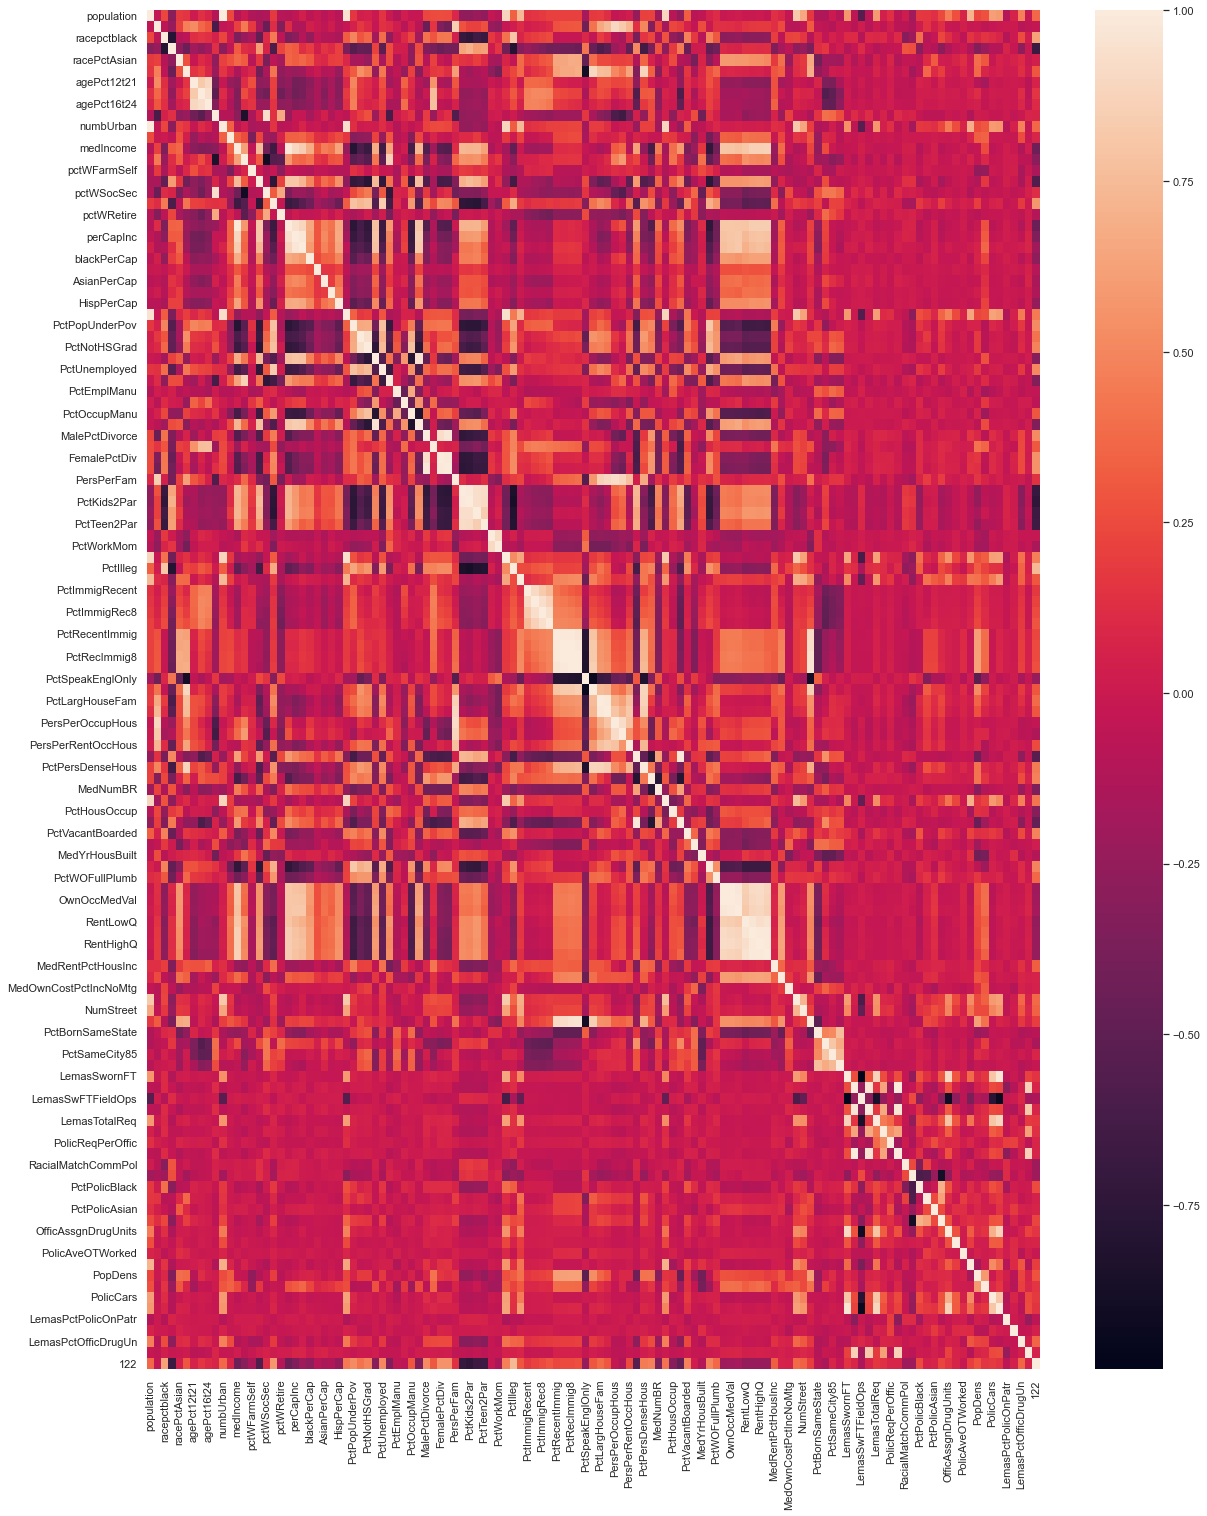

In [48]:
X = pd.concat([X_train, X_test])
X.reset_index(drop=True, inplace=True)

y = pd.concat([Y_train, Y_test])
y.reset_index(drop=True, inplace=True)

values = pd.concat([X, y], axis=1)
fig = mplt.figure(figsize=(20, 25))
sns.heatmap(values.corr())
mplt.show()

# (d) Calculate the Coefficient of Variation CV for each feature, where CV = ms , in which s is sample standard deviation and m is sample mean..

In [49]:
variation = []
for i in values.columns:
    variation.append(np.std(values[i])/np.mean(values[i]))
print("The variations are as follows:")
print()
print()
print(variation)
#print(len(variation))

The variations are as follows:


[2.2029499338653187, 0.35320970041190364, 1.4105665605340405, 0.32370036336013336, 1.3588213380942586, 1.613872957148404, 0.36574812216271013, 0.290619987380047, 0.4950363361780553, 0.42333551661050045, 2.001241633513718, 0.6386886583257838, 0.5796080008727301, 0.327627874264053, 0.6998545594658843, 0.35914985569917485, 0.3684202133633651, 0.6988551987450087, 0.3495513990736712, 0.5275995387856802, 0.5454965924474837, 0.5074249049035474, 0.5893211744649149, 0.8094820310422658, 0.6060418273404299, 0.6704798825966286, 0.4738408572341722, 2.304391666011784, 0.7537910884956593, 0.6754307871530835, 0.5281537809121716, 0.5782557850622498, 0.5559933294527711, 0.34724014147772386, 0.5104522961225946, 0.3981258072393741, 0.5083337971819726, 0.4219999986300119, 0.3954841631402557, 0.4037103467775632, 0.35918260394972323, 0.37137499520300693, 0.31687526059726756, 0.33052822510497293, 0.3323925011805811, 0.32934322729395377, 0.32846855204578795, 0.3361641243837577,

# (e) Pick 128⌋ features with highest CV , and make scatter plots and box plots for them. Can you draw conclusions about significance of those features, just by the scatter plots?

In [50]:
col = columns
col.remove('state')
col.remove('community')
col.remove('communityname')
col.remove('county')
col.remove('fold')
# selected = {}
# for i in zip(X, variation):
#     column_dict[i[0]] = i[1]
# column_dict = {k:v for k,v in sorted(column_dict.items(), key = lambda x: x[1], reverse=True)}
# print(column_dict)

feat = dict()
# for i in 
#print(col)
for i in range(len(col)):
    feat[col[i]] = variation[i]
sorted_values = sorted(feat.values(), reverse=True) # Sort the values
sorted_dict = {}

for i in sorted_values:
    for k in feat.keys():
        if feat[k] == i:
            sorted_dict[k] = feat[k]
            break
            
print(sorted_dict)


{'NumStreet': 4.406597060924119, 'NumInShelters': 3.484607166824025, 'NumIlleg': 2.993445553811178, 'NumImmig': 2.899769766465966, 'LemasPctOfficDrugUn': 2.554625183856767, 'NumUnderPov': 2.304391666011784, 'population': 2.2029499338653187, 'numbUrban': 2.001241633513718, 'HousVacant': 1.9582884997480876, 'LandArea': 1.6776106536570135, 'racePctHisp': 1.613872957148404, 'PctNotSpeakEnglWell': 1.4587006872032604, 'PctUsePubTrans': 1.4163173862562708, 'racepctblack': 1.4105665605340405, 'racePctAsian': 1.3588213380942586, 'PctRecentImmig': 1.2997742561183292, 'PctRecImmig5': 1.2973063815277848, 'PctRecImmig10': 1.2837117586585471, 'PctRecImmig8': 1.2809116606682727, 'PctPersDenseHous': 1.1269169022428838, 'PctForeignBorn': 1.0720223886376927, 'PctVacantBoarded': 1.0644754034081747, 'ViolentCrimesPerPop': 0.9787692811532713, 'PctIlleg': 0.9195722173766283, 'PctHousNoPhone': 0.9179806929913121, 'OwnOccMedVal': 0.8785294607070863, 'PctPolicAsian': 0.8760548144065381, 'OwnOccHiQuart': 0.8745

In [51]:
features = dict(itertools.islice(sorted_dict.items(), int(math.sqrt(128))))

In [52]:
print('Features that are selected :', list(features.keys()))

Features that are selected : ['NumStreet', 'NumInShelters', 'NumIlleg', 'NumImmig', 'LemasPctOfficDrugUn', 'NumUnderPov', 'population', 'numbUrban', 'HousVacant', 'LandArea', 'racePctHisp']


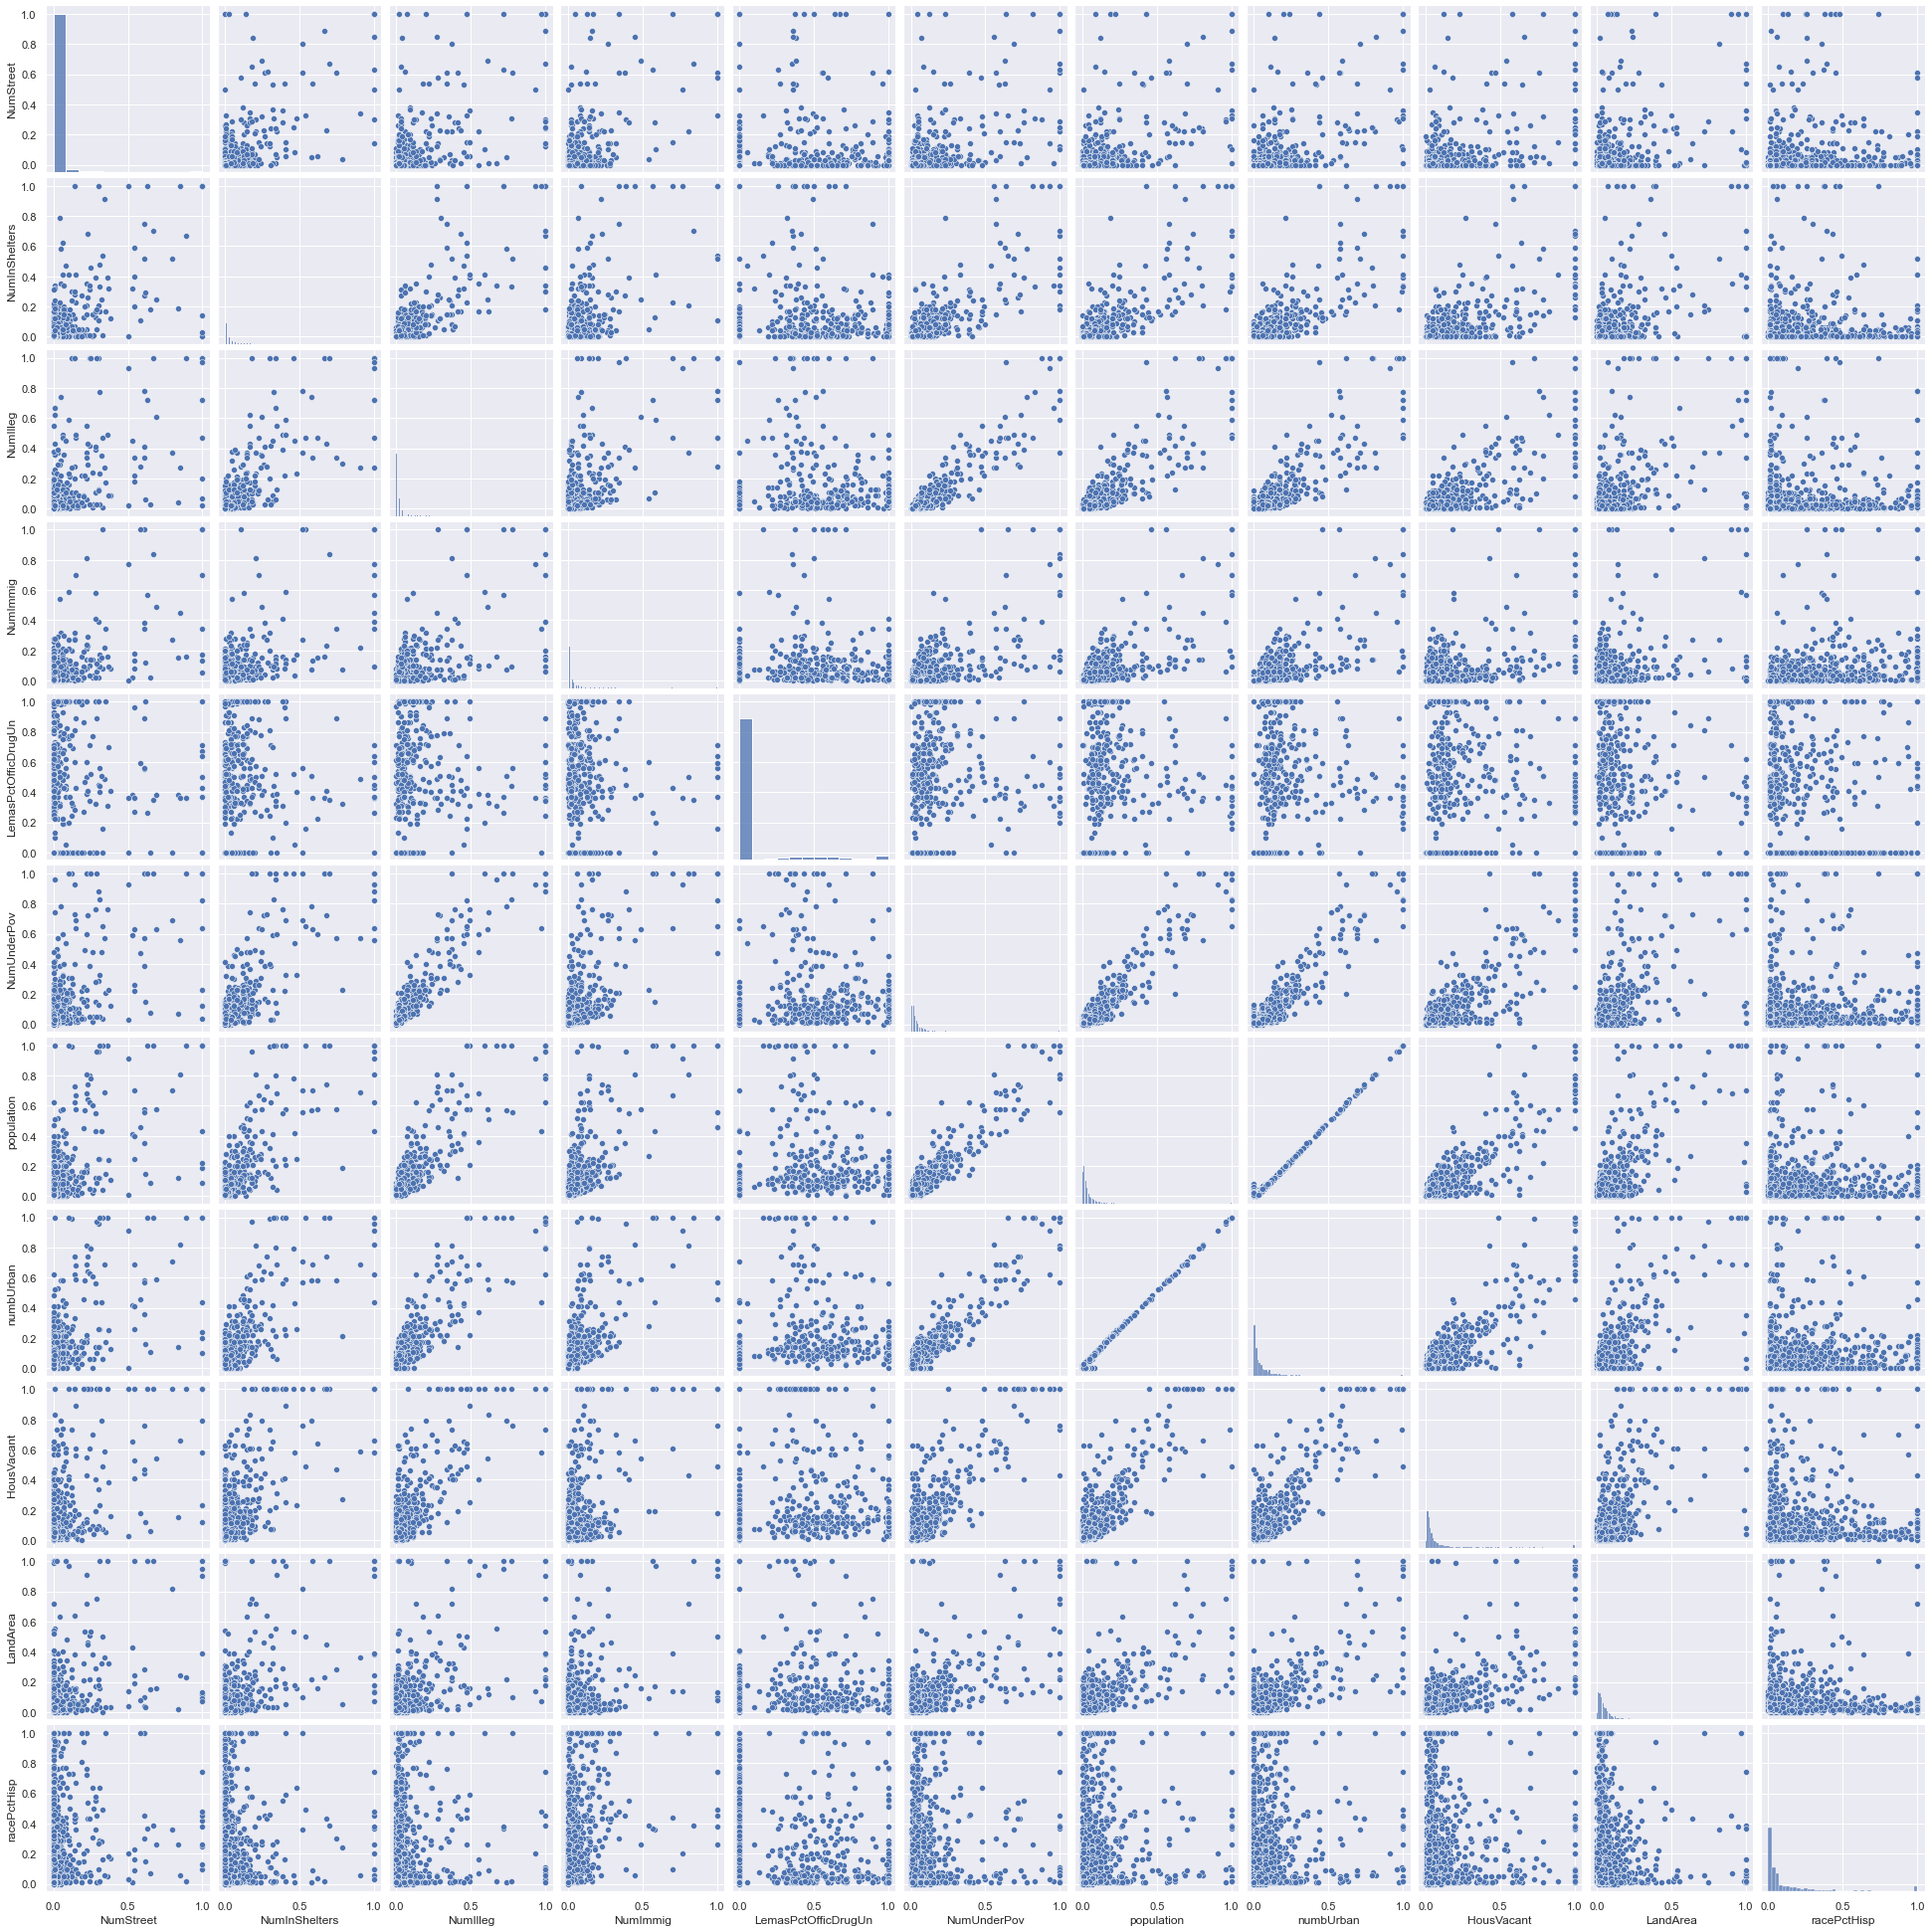

In [53]:
scatter_plot = sns.pairplot(values[features.keys()])
mplt.show()

/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misi

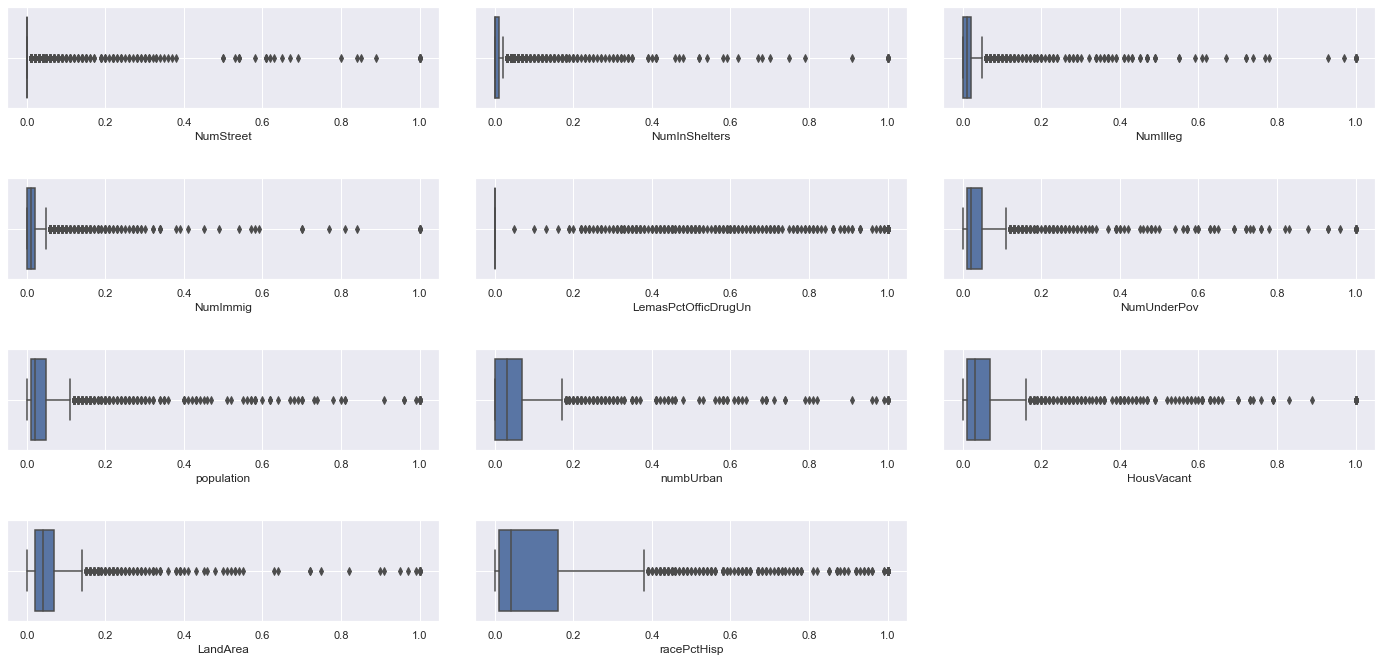

In [54]:
feature_col = list(features.keys())
fig, axes = mplt.subplots(4, 3, figsize=(20, 10))

count = 0
for i in range(4):
    for j in range(3):
        if count <= len(feature_col)-1:
            sns.boxplot(values[feature_col[count]], ax=axes[i, j])
            axes[i, j].grid(True)
            count += 1
axes[3, 2].remove()
fig.tight_layout(pad=3.0)
mplt.show()

# Ans: No we cannot draw conclusions about significance of those features just by scatter plots.

# (f) Fit a linear model using least squares to the training set and report the test error.

In [55]:
linmodel = LinearRegression()
linmodel.fit(X_train, Y_train)
YP = linmodel.predict(X_test)
print("Mean Squared Error: ", mean_squared_error(Y_test, YP))

Mean Squared Error:  3.985498522857181e+17


# (g) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.

In [56]:
ridgemodel = Pipeline(steps = [('s', StandardScaler()), ('m', RidgeCV(cv=10))])
ridgemodel.fit(X_train, Y_train)
YP = ridgemodel.predict(X_test)
print("Mean Squared Error: ", mean_squared_error(Y_test, YP))
print ('Test Error Score : ', 1 - ridgemodel.score(X_test, Y_test))

Mean Squared Error:  0.01784402378009155
Test Error Score :  0.37522681093461574


# (h) Fit a LASSO model on the training set, with λ chosen by cross-validation. Report the test error obtained, along with a list of the variables selected by the model. Repeat with standardized4 features. Report the test error for both cases and compare them.

In [57]:
lassomodel = LassoCV(cv=10, random_state=0)
lassomodel.fit(X_train, Y_train)
YP = lassomodel.predict(X_test)
print("Lasso with standardized features:")
print()
print("Mean Squared Error: ", mean_squared_error(Y_test, YP))
print ('Test Error Score : ', 1 - ridgemodel.score(X_test, Y_test))
print ()
print ('Features : ', list(X_train.columns[np.where(lassomodel.coef_ != 0)]))
print ()
print ('Total Features : ', len(list(X_train.columns[np.where(lassomodel.coef_ != 0)])))
print ()

Lasso with standardized features:

Mean Squared Error:  0.01777054420371311
Test Error Score :  0.37522681093461574

Features :  ['racepctblack', 'racePctAsian', 'agePct12t21', 'agePct12t29', 'agePct65up', 'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'PctPopUnderPov', 'PctLess9thGrade', 'PctBSorMore', 'PctEmploy', 'PctEmplManu', 'PctOccupManu', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRec10', 'PctRecImmig10', 'PctNotSpeakEnglWell', 'PctLargHouseOccup', 'PersPerOccupHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'RentLowQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnC

In [58]:
print("Lasso with standndarl features")
print()
print()
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.fit_transform(X_test)

lassomodel = LassoCV(cv=10, random_state=0)
lassomodel.fit(X_train_std, Y_train)
YP = lassomodel.predict(X_test_std)

print()
print("Mean Squared Error: ", mean_squared_error(Y_test, YP))
print ('Test Error Score : ', 1 - ridgemodel.score(X_test, Y_test))
print ()
print ('Features : ', list(X_train.columns[np.where(lassomodel.coef_ != 0)]))
print ()
print ('Total Features : ', len(list(X_train.columns[np.where(lassomodel.coef_ != 0)])))
print ()

Lasso with standndarl features




/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010070705961709336, tolerance: 0.0076108375910780655
  model = cd_fast.enet_coordinate_descent_gram(
/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01080302185883042, tolerance: 0.007474577130111527
  model = cd_fast.enet_coordinate_descent_gram(
/Users/gauravmakasare/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00820784841236133, tolerance: 0.007655550430906391
  model = cd_fast.enet_coordinate_descent_gram(
/Users/gauravm


Mean Squared Error:  0.018024724801720175
Test Error Score :  0.37522681093461574

Features :  ['population', 'racepctblack', 'racePctAsian', 'agePct12t21', 'agePct12t29', 'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'PctPopUnderPov', 'PctLess9thGrade', 'PctEmploy', 'PctEmplManu', 'PctOccupManu', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRec10', 'PctRecImmig10', 'PctNotSpeakEnglWell', 'PctLargHouseOccup', 'PersPerOccupHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'RentLowQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelt

# (i) Fit a PCR model on the training set, with M (the number of principal compo- nents) chosen by cross-validation. Report the test error obtained.

In [59]:
linmodel = LinearRegression()
n = len(X_train)
m_square_error = []
score = -1 * cross_val_score(linmodel, np.ones((n,1)), np.array(Y_train).ravel(), cv=10, scoring='neg_mean_squared_error').mean()    
m_square_error.append(score)

In [60]:
for i in np.arange(1, len(X_train.columns)):
    pca = PCA(n_components=i)
    X_train_red = pca.fit_transform(scale(X_train))
    score = -1 * cross_val_score(linmodel, X_train_red, np.array(Y_train).ravel(), cv=10, scoring='neg_mean_squared_error').mean()
    m_square_error.append(score)


In [61]:
for i,v in enumerate(list(m_square_error)):
    if v == min(m_square_error):
        best_m = i

In [62]:
pca2 = PCA(n_components = best_m)
X_train_red = pca2.fit_transform(scale(X_train))
X_test_red = pca2.fit_transform(scale(X_test))
model = LinearRegression()
model.fit(X_train_red, Y_train)
YP = model.predict(X_test_red)
print ('Best M : ', best_m)
print('Mean Square Error : ', mean_squared_error(Y_test, YP))
print('Test Error Score : ', 1 - model.score(X_test_red, Y_test))

Best M :  95
Mean Square Error :  0.04539428377785407
Test Error Score :  0.9545578142318389


# (j) In this section, we would like to fit a boosting tree to the data. As in classification trees, one can use any type of regression at each node to build a multivariate regression tree. Because the number of variables is large in this problem, one can use L1-penalized regression at each node. Such a tree is called L1 penalized gradient boosting tree. You can use XGBoost5 to fit the model tree. Determine α (the regularization term) using cross-validation.

In [63]:
new_train = xgb.DMatrix(data = X_train, label = Y_train)
new_test = xgb.DMatrix(data = X_test, label = Y_test)
xgbmodel = xgb.XGBRegressor(n_estimators=200, max_depth=5, objective="reg:squarederror", silent=1, n_jobs=-1)
grid = GridSearchCV(estimator = xgbmodel, param_grid={'reg_alpha': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]}, cv=10, n_jobs=-1)
grid.fit(X_train, Y_train)

[20:59:55] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=5, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=200, n_jobs=-1,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
           

In [64]:
best_alpha = grid.best_params_
print ('Best parameters for alpha : ', best_alpha['reg_alpha'])


Best parameters for alpha :  0.1


In [65]:

best_estimator = grid.best_estimator_
print ('Best estimator : ', best_estimator)

Best estimator :  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, silent=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)
[20:58:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually bei

[20:58:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:58:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:58:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  